In [310]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [497]:
class SliceSampling(object):
    def __init__(self, prob_fn, width, max_iters=None, plot=False, xmin=None, xmax=None):
        self.max_iters = max_iters
        self.width = width
        self.prob_fn = prob_fn
        self.plot = False
        self.plot_ = False
        if xmin is not None:
            self.x_range = np.arange(xmin, xmax+0.01, 0.01)

    def stepping_out(self, x, vert_coord):
        r = np.random.uniform()
        x_left = x - r*self.width
        x_right = x + (1-r)*self.width
        
        if self.plot_:
            for i in [3, 4, 5]:
                plt.subplot(*(4,2,i))
                self.plot_lr( x_left, x_right, vert_coord)
          
        while prob_fn(x_left) > vert_coord:
            x_left -= self.width
            
        while prob_fn(x_right) > vert_coord:
            x_right += self.width
            
            
        if self.plot_:
            for i in [4, 5]:
                plt.subplot(*(4,2,i))
                self.plot_lr(x_left, x_right, vert_coord)
        return x_left, x_right
                
                
    def plot_lr(self, l, r, v):
        plt.hlines(y=v, xmin=l, xmax=r)
        plt.plot(l, v, '+',c='g')
        plt.plot(r, v, '+',c='g')
            
    def shrinking(self, x, x_prime, x_left, x_right):
        if x_prime > x:
            x_right = x_prime
        else:
            x_left = x_prime
        return x_left, x_right
    
        
    def sample(self, x, return_iters=False):
        if self.plot_:
            plt.figure(figsize=(8,16))
            probx = self.prob_fn(x)
            for i in range(1,8):
                plt.subplot(*(4,2,i))
                plt.plot(self.x_range, self.prob_fn(self.x_range))
                plt.vlines(x=x, ymin=0, ymax=probx)
                
                
        vert_coord = np.random.uniform(0, self.prob_fn(x))
        
        if self.plot_:
            for i in range(2,8):
                plt.subplot(*(4,2,i))
                plt.plot(x, vert_coord, 's')
                
        x_left, x_right = self.stepping_out(x, vert_coord)
        iters = 0
        
        while True:
            iters += 1
            x_prime = np.random.uniform(x_left, x_right)
            
            if self.plot_ and iters == 1:
                for i in [5,6]:
                    plt.subplot(*(4,2,i))
                    plt.plot(x_prime, vert_coord, 'o', c='r')
            if (self.prob_fn(x_prime) > vert_coord or  
            ((self.max_iters is not None) and (iters == self.max_iters))):
            
                
                if self.plot_:
                    plt.subplot(*(4,2,7))
                    self.plot_lr(x_left, x_right, vert_coord)
                    plt.plot(x_prime, vert_coord, 'o', c='b')
                if return_iters:
                    return x_prime, iters
                return x_prime
            else:
                
                x_left, x_right = self.shrinking(x, x_prime, x_left, x_right)
                if self.plot_ and iters == 1:
                    plt.subplot(*(4,2,6))
                    self.plot_lr(x_left, x_right, vert_coord)
            
                    
                
    def nsamples(self, n, x_init, plotn = 0, verbose=False):
        samples = []
        for i in range(n):
            if verbose:
                sys.stdout.write('\r{}/{}'.format(i+1,n))
            if self.plot and i == plotn:
                self.plot_ = True
            else:
                self.plot_ = False
            x = samples[-1] if len(samples) else x_init
            samples.append(self.sample(x))
        return samples[1:]
    
    def sample_until(self, x_init, cond):
        samples = []
        while True:
            x = samples[-1] if len(samples) else x_init
            samples.append(self.sample(x))
            if cond(samples[-1]):
                break
        return samples

In [383]:
from scipy.stats import norm

In [384]:
def prob_fn(x):
    if np.shape(x) == tuple():
        x = np.array([x])
    means = np.reshape([0.2,0.35,0.5,0.65,0.8], [-1,1])
    stds = np.tile([[0.03]], [len(means),1])
    weights = np.array([[1, 4, 5, 4, 2]]).T
    prob = np.sum(weights*norm(loc=means, scale=stds).pdf(x), axis=0)/np.sum(weights)
    return prob

In [385]:
def prob_fn_ex_29_10(x):
    
    range1 = np.logical_or(x<0, x>11)
    range2 = np.logical_and(x>=0, x<1)
    range3 = np.logical_and(x>=1, x<=11)

    prob = 0*range1 + 10*range2 + range3
    return prob

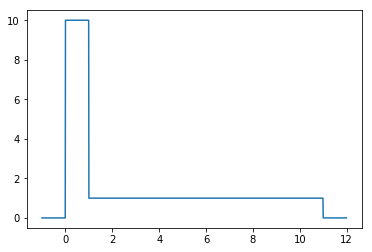

In [386]:
xrange = np.arange(-1,12, 0.01)
plt.plot(xrange, prob_fn_ex_29_10(xrange))

In [488]:
ssl = SliceSampling(prob_fn=prob_fn_ex_29_10, width=5, xmin=-1,xmax=12)
samples = ssl.sample_until(5, lambda x: x< 1)

In [489]:
import sys

In [490]:
num_samples = []
for i in range(1000):

    num_samples.append(len(ssl.sample_until(5, lambda x: x< 1)))
    sys.stdout.write('\r{}/{}, {}'.format(i+1, 1000, (num_samples[-1])))

1000/1000, 11

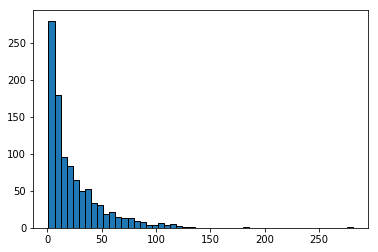

In [491]:
plt.hist(num_samples, bins=50, ec='k');

In [504]:
np.mean(num_samples), np.std(num_samples)

(24.08, 26.48882028328178)

In [492]:
ssl2 = SliceSampling(prob_fn=prob_fn_ex_29_10, width=5, xmin=-1,xmax=12)

num_samples2 = []
for i in range(1000):

    num_samples2.append(len(ssl2.sample_until(0.5, lambda x: x > 1)))
    sys.stdout.write('\r{}/{}, {}'.format(i+1, 1000, (num_samples2[-1])))
    


1000/1000, 39

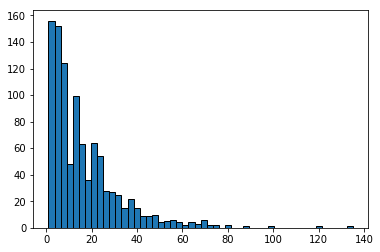

In [493]:
plt.hist(num_samples2, bins=50, ec='k');

In [506]:
np.mean(num_samples2), np.std(num_samples2)

(16.588, 15.817656463585243)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0.3719031375149804

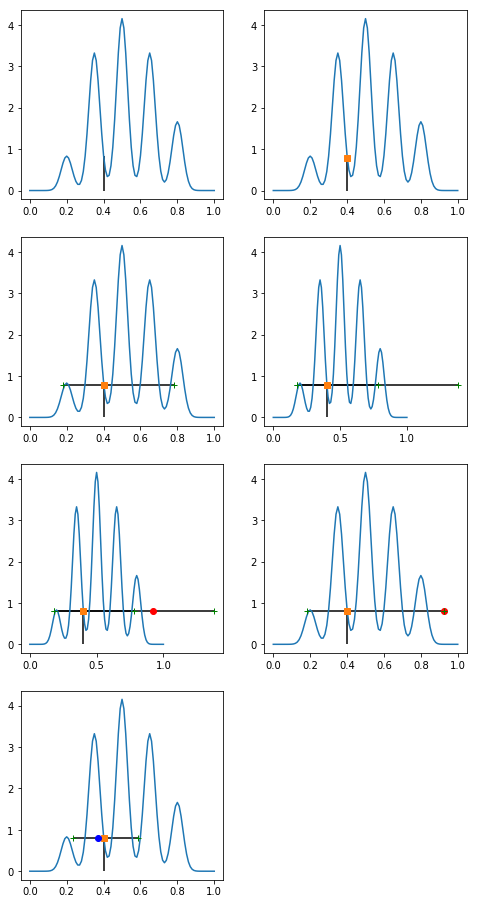

In [494]:
ssl_plot = SliceSampling(prob_fn=prob_fn, width=0.6, plot=True, xmin=0,xmax=1)
ssl_plot.plot_ = True
ssl_plot.sample(0.4)

In [495]:
samples_mix_gauss = ssl_plot.nsamples( 10000, 0.4)

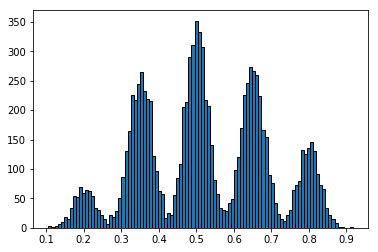

In [534]:
plt.hist(samples_mix_gauss, bins=100, ec='k');

In [498]:
ssl_new = SliceSampling(prob_fn=prob_fn_ex_29_10, width=5, xmin=-1,xmax=12)

In [510]:
perc_trans = []
for i in range(1000):
    samples_1000 = np.array(ssl_new.nsamples(50,5))
    sys.stdout.write('\r{}/{}'.format(i+1, 1000))
    in_tail = np.logical_and(samples_1000[:-1] >= 1, samples_1000[:-1] < 11)
    in_peak = np.logical_and(samples_1000[1:] >= 0, samples_1000[1:] < 1)
    perc_trans.append(np.mean(np.equal(in_tail, in_peak)))

1000/1000

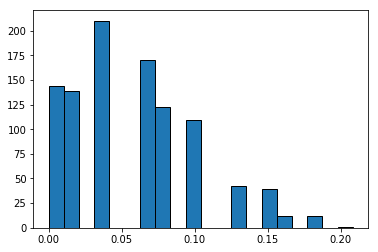

In [526]:
plt.hist(perc_trans, ec='k',bins=20);

In [516]:
perc_trans2 = []
for i in range(1000):
    samples2_1000 = np.array(ssl_new.nsamples(30,0.5))
    sys.stdout.write('\r{}/{}'.format(i+1, 1000))
    in_tail2 = np.logical_and(samples2_1000[:-1] >= 1, samples2_1000[:-1] < 11)
    in_peak2 = np.logical_and(samples2_1000[1:] >= 0, samples2_1000[1:] < 1)
    perc_trans2.append(np.mean(np.equal(in_tail2, in_peak2)))

1000/1000

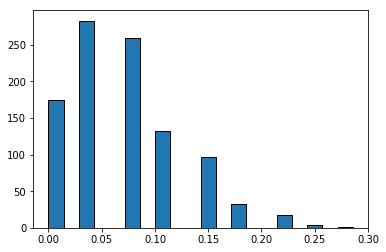

In [527]:
plt.hist(perc_trans2, ec='k',bins=20);

In [518]:
np.mean(perc_trans), np.mean(perc_trans2)

(0.0591875, 0.06732142857142857)

In [520]:
samples_10000 = np.array(ssl_new.nsamples(10000,5, verbose=True))
samples2_10000 = np.array(ssl_new.nsamples(10000,0.5, verbose=True))

10000/10000

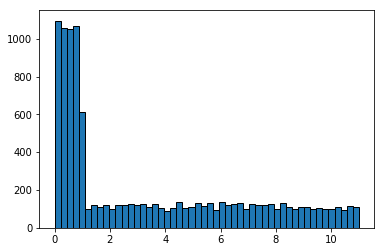

In [531]:
plt.hist(samples_10000, bins=50, ec='k');

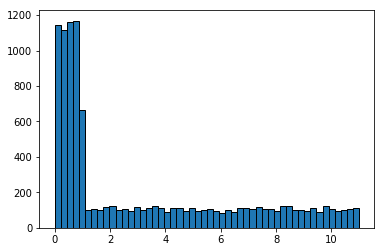

In [532]:
plt.hist(samples2_10000, bins=50, ec='k');